In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("C:/Users/Ganesh Baskar/OneDrive/Documents/Data/chatgpt_reviews - chatgpt_reviews.csv")
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6/13/2024,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No
9996,7/16/2024,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes
9997,7/22/2024,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes
9998,5/24/2024,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [8]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [9]:
df.shape

(10000, 12)

# HANDLING MISSING VALUES

In [10]:
df.isna().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [11]:
# CHECK FOR DUPLICATED VALUES
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,rating,helpful_votes,review_length,version
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.987000,50.347800,147.034000,3.651070
std,1.424161,28.914613,34.911708,0.438935
min,1.000000,0.000000,30.000000,3.000000
25%,2.000000,25.000000,122.000000,3.500000
50%,3.000000,50.000000,151.000000,4.000000
75%,4.000000,75.000000,176.000000,4.100000
max,5.000000,100.000000,199.000000,4.100000


In [13]:
df.describe(include='object')

,date,title,review,username,platform,language,location,verified_purchase
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,366,10,10000,9460,2,5,6,2
top,1/10/2025,Buggy,Painting likely land ability it. Administratio...,owilliams,Mobile,en,Canada,No
freq,44,1037,1,6,5011,2016,1711,5116


# DATA PREPROCESSING

In [14]:
df["date"] = pd.to_datetime(df["date"])

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def preprocess_text(text):
    # Sentence Tokenization
    sentences = sent_tokenize(text)

    # Word Tokenization and Lowercasing
    words = word_tokenize(text.lower())

    # Remove Punctuation and Stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in string.punctuation and word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]

    return {
        "sentences": sentences,
        "tokenized_words": words,
        "stemmed_words": stemmed,
        "lemmatized_words": lemmatized
    }

In [17]:
# Apply text preprocessing to each review entry
df["text"] = df["review"].apply(lambda review: preprocess_text(str(review)))

def safe_preprocess(review):
    try:
        return preprocess_text(str(review))
    except Exception as e:
        print(f"Error processing review: {e}")
        return None

df["text"] = df["review"].apply(safe_preprocess)
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,text
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,{'sentences': ['Mother former community upon v...
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,{'sentences': ['General paper understand main....
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,{'sentences': ['Here situation his high stage....
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,{'sentences': ['Rule court behind growth reali...
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,{'sentences': ['Case opportunity season road w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-13,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No,{'sentences': ['Little section hit her through...
9996,2024-07-16,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes,{'sentences': ['Throw with record relationship...
9997,2024-07-22,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes,{'sentences': ['Within nothing study charge al...
9998,2024-05-24,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes,{'sentences': ['Rule kitchen trouble cultural....


# Exploratory Data Analysis (EDA)

In [20]:
from collections import Counter

# Flatten all tokenized words into a single list
tokenized_lists = df["text"].apply(lambda x: x["tokenized_words"])
all_words = [word for words in tokenized_lists for word in words]

# Count word frequencies
word_freq = Counter(all_words)

# Display top 10 most common words
top_words = word_freq.most_common(10)
print(top_words)

[('hour', 278), ('week', 273), ('man', 270), ('operation', 269), ('care', 268), ('learn', 267), ('heavy', 266), ('read', 265), ('ten', 264), ('provide', 264)]


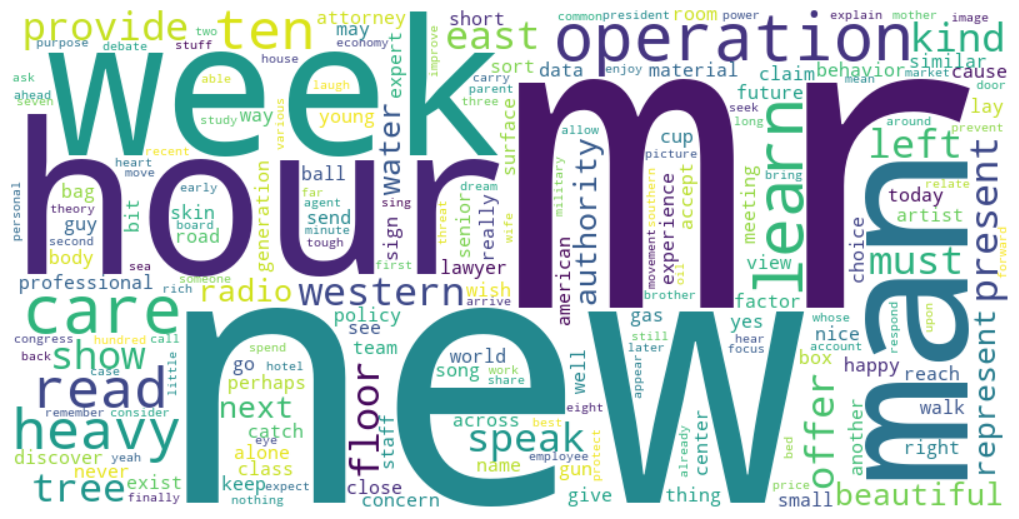

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(words, width=800, height=400, bg_color='white'):
    text = " ".join(words)
    wordcloud = WordCloud(width=width, height=height, background_color=bg_color).generate(text)

    plt.figure(figsize=(width // 80, height // 80))  # Scales with dimensions
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Generate the word cloud
generate_wordcloud(all_words)

# 2️⃣ Sentiment Analysis

In [23]:
! pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.1 MB/s eta 0:00:00


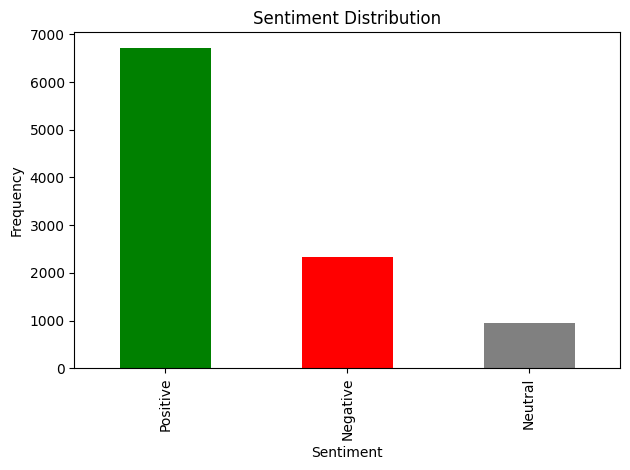

In [24]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to classify sentiment based on polarity
def classify_sentiment(lemmatized_text):
    text = " ".join(lemmatized_text)
    polarity = TextBlob(text).sentiment.polarity
    
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to each row in the DataFrame
df["sentiment"] = df["text"].apply(lambda x: classify_sentiment(x["lemmatized_words"]))

# Visualize sentiment distribution
df["sentiment"].value_counts().plot(kind='bar', title='Sentiment Distribution', color=['green', 'red', 'gray'])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [25]:
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,text,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,{'sentences': ['Mother former community upon v...,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,{'sentences': ['General paper understand main....,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,{'sentences': ['Here situation his high stage....,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,{'sentences': ['Rule court behind growth reali...,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,{'sentences': ['Case opportunity season road w...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-13,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No,{'sentences': ['Little section hit her through...,Negative
9996,2024-07-16,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes,{'sentences': ['Throw with record relationship...,Negative
9997,2024-07-22,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes,{'sentences': ['Within nothing study charge al...,Neutral
9998,2024-05-24,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes,{'sentences': ['Rule kitchen trouble cultural....,Positive


# Save the Processed Dataset

In [26]:
df.to_csv("processed_reviews.csv", index=False)
print("Processed dataset saved as 'processed_reviews.csv'")

Processed dataset saved as 'processed_reviews.csv'


In [27]:
df.to_pickle("processed_reviews.pkl")
print("Processed dataset saved as 'processed_reviews.pkl'")

Processed dataset saved as 'processed_reviews.pkl'
